In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import numpy as np

In [2]:
#get project data
df_data = pd.read_csv('p1_procesed_data.csv')

In [3]:
#from Murat Guner Linear Regression.ipynb
#split the data into training and test data sets
df_xtrain, df_xtest = train_test_split(df_data,test_size = .2)

In [4]:
#confirm the division of data
print('df_data shape:',df_data.shape)
print('df_xtrain shape:',df_xtrain.shape)
print('df_xtest shape:',df_xtest.shape)

df_data shape: (236, 8)
df_xtrain shape: (188, 8)
df_xtest shape: (48, 8)


# Show plots here of each predictor against the response

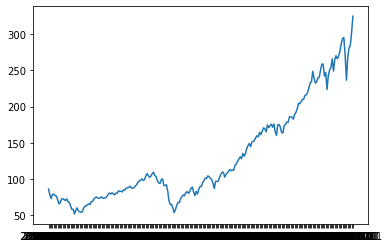

In [5]:
plt.plot(df_data['Date'],df_data['van500'])

In [6]:
df_xtrain.columns

Index(['Unnamed: 0', 'Date', 'cci', 'poilbre', 'pgold', 'cpi', 'ppi',
       'van500'],
      dtype='object')

In [7]:
df_xtrain.head()

,Unnamed: 0,Date,cci,poilbre,pgold,cpi,ppi,van500
133,133,2012-02-01,98.58278,119.702381,1742.619048,228.329,174.5,106.370796
42,42,2004-07-01,101.08150,38.371364,398.090909,189.100,113.3,73.358429
136,136,2012-05-01,98.69314,110.521739,1585.504545,228.713,179.8,102.613838
124,124,2011-05-01,98.04996,114.458182,1510.437500,224.806,172.2,103.076454
162,162,2014-07-01,99.39211,106.983043,1310.967391,237.498,187.3,158.195053


In [8]:
#from Murat Guner Linear Regression.ipynb
X = df_xtrain[['cci', 'poilbre', 'pgold','cpi','ppi']]
y = df_xtrain.van500
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst= True)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 van500   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     410.9
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           4.18e-97
Time:                        09:08:39   Log-Likelihood:                -822.49
No. Observations:                 188   AIC:                             1657.
Df Residuals:                     182   BIC:                             1676.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1556.0158    136.247    -11.421      0.0

### Analysis

#### Question: Is there a Relationship between the response and the predictors?

To determine whether there is a relationship between the repsonse and the predictors, we  use a hypothesis test, asking:
\begin{align}
\beta_{1}=\beta_{2}=\beta_{3}=\beta_{4}=\beta_{5}=0
\end{align}
<p>The test is run by calculating the F-statistic.  If the resulting statistic is greater than 1 the null hypothesis is rejected and there is at least one predictor that is related to the value of the vanguard 500.  In the OLS Regression results above the F-statistic is 391.</p>  Therefore at least one predictor is related to the response variable.

#### Question 2: Which variables are important?

Of the five predictors, two have values that are less significant than they others: pgold and ppi.  I will perform backwards selection an remove the pgold variable and assess the effect on the model.  I will use p>=3 as my stop rule. 

In [9]:
df_data.drop(columns='pgold', inplace =True)

In [10]:
df_xtrain, df_xtest = train_test_split(df_data,test_size = .2)
X = df_xtrain[['cci', 'poilbre', 'cpi','ppi']]
y = df_xtrain.van500
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst= True)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 van500   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     585.1
Date:                Sun, 20 Sep 2020   Prob (F-statistic):          4.64e-103
Time:                        09:08:39   Log-Likelihood:                -809.26
No. Observations:                 188   AIC:                             1629.
Df Residuals:                     183   BIC:                             1645.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1942.1218    118.762    -16.353      0.0

### Analysis

<p> Dropping pgold seems to have been effective.  R-squared increased from .922 to .924, which I will read as no change.  The F-statistic increased from 430 to 537, meaning my predictors are still related to the reponse variable.  The p-value of ppi has increased from 0.067 to 0.432.  I will continue with backwards selection.  I will continue to use p>=3 as my stop rule. 

In [11]:
df_data.drop(columns='ppi', inplace =True)

In [12]:
df_xtrain, df_xtest = train_test_split(df_data,test_size = .2)
X = df_xtrain[['cci', 'poilbre', 'cpi']]
y = df_xtrain.van500
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst= True)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 van500   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     629.8
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           1.77e-96
Time:                        09:08:39   Log-Likelihood:                -832.09
No. Observations:                 188   AIC:                             1672.
Df Residuals:                     184   BIC:                             1685.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1639.8476    130.588    -12.557      0.0

### Analysis

<p> Dropping ppi was effective.  While R-squared decreased from .924 to .911, the change is small and R-squared is affected by then number of predictors regardless of the predictive ability.  Therefore I will read the decrease in p-value as no change.  The F-statistic further increased from 537 to 629, meaning my predictors are still related to the reponse variable.  The p-value of the remaining predictors is tiny, suggesting they are statistically significant.

In [14]:
#from Murat Guner Linear Regression.ipynb
Xtest = df_xtest[['cci', 'poilbre', 'cpi']]
ytest = df_xtest.van500
Xtest = sm.add_constant(Xtest)

res.predict(Xtest);

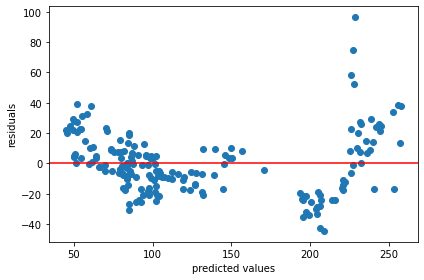

In [15]:
#from Murat Guner Linear Regression.ipynb
residuals = res.resid

y_pred = res.predict(X)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color = 'red', label = '0')

plt.xlabel('predicted values')

plt.ylabel('residuals')

plt.tight_layout()